# Hierarchical analysis

One of the methods of analysis and gropuing we are using to create clusters is hierachical analisis. It allows us to visualize a specific groups in a tree or tree-root form. Additionally, we can see potential clusters from the beginning.

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
import seaborn as sns

In [2]:
data = pd.read_csv("../data/03_Processed/02_ProcessedData.csv")

In [3]:
data.set_index('ID', inplace=True)

In [4]:
datawithoutknowledge = pd.read_csv('../data/03_Processed/02_ProcessedDataWithoutIndustryKnowledge.csv')

To be able to generate correct dendrograms we are setting ID as an index for the generated dendrograms.

In [5]:
datawithoutknowledge.set_index('ID', inplace=True)


## Data with Industry Knowledge

Our first experiment consists of data with industry knowledge.

We are also experimenting a bit with different distances like "Manhattan" and "Euclidean".

In [6]:
euclidean_dist = pdist(data, metric='euclidean')
manhattan_dist = pdist(data, metric='cityblock')


euclidean_clustering = sch.linkage(euclidean_dist, method='ward')
manhattan_clustering = sch.linkage(manhattan_dist, method='ward')



### Euclidean Distance

The first dendrogram that we will generate to check its clusters is dependant on euclidean distance.

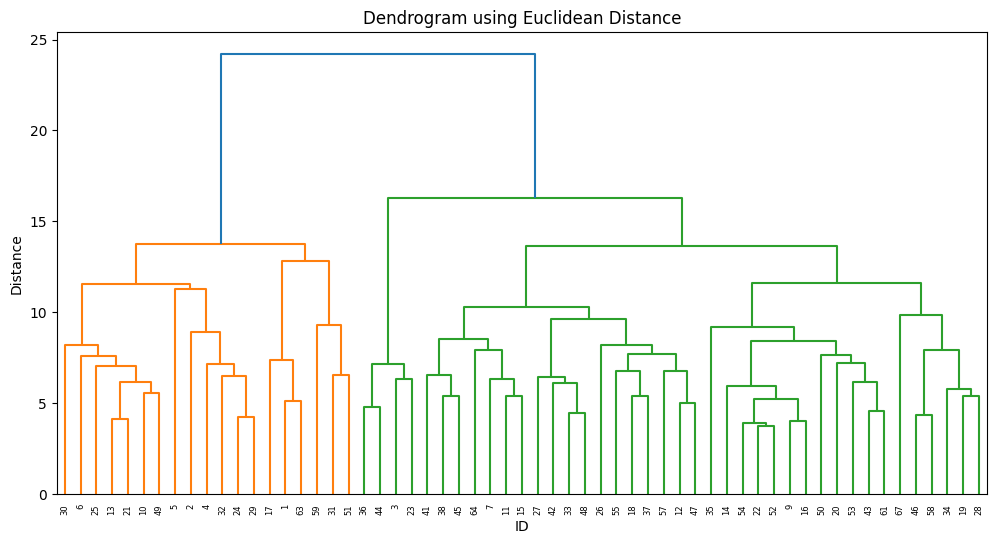

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Euclidean Distance')
sch.dendrogram(euclidean_clustering, labels=data.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.savefig('../figures/04_euclidean_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()


### Manhattan Distance

Secondly, we are testing the manhattan distance.

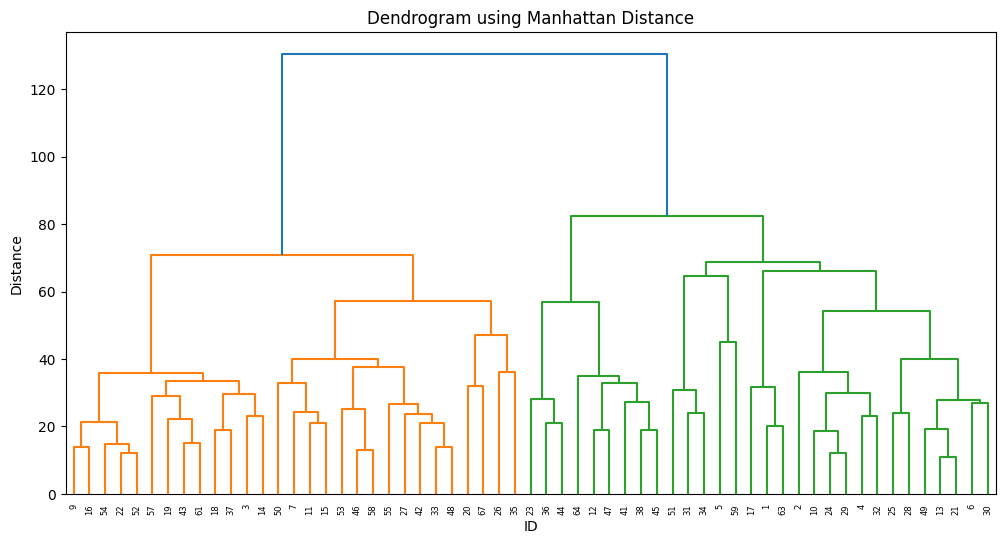

In [8]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Manhattan Distance')
sch.dendrogram(manhattan_clustering, labels=data.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.savefig('../figures/04_manhattan_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

### Differences

As we can see both distances generate different dendrograms. This brigns us to the next step to create clusters and assign ID to the them.


### Clustering

Firstly, we need to determine cut-off point in both dendrograms. This will allow us to determine number o clusters for each of distances.

In [9]:
threshold_euclidean = 14  
threshold_manhattan = 50  

euclidean_clusters = fcluster(euclidean_clustering, t=threshold_euclidean, criterion='distance')

manhattan_clusters = fcluster(manhattan_clustering, t=threshold_manhattan, criterion='distance')

data['Euclidean Cluster'] = euclidean_clusters
data['Manhattan Cluster'] = manhattan_clusters

### Number of clusters

Thank to this formula we learn how many clusters we created for each distance for data with industrial knowledge.

In [10]:
num_euclidean_clusters = len(np.unique(euclidean_clusters))
num_manhattan_clusters = len(np.unique(manhattan_clusters))

print(f"Liczba klastrów (odległość euklidesowa): {num_euclidean_clusters}")
print(f"Liczba klastrów (odległość Manhattan): {num_manhattan_clusters}")

Liczba klastrów (odległość euklidesowa): 3
Liczba klastrów (odległość Manhattan): 10


### Cluster members

Now knowing the number of clusters, we can assign members to each of them for both distances.

In [11]:
euclidean_cluster_assignment = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
manhattan_cluster_assignment = data.groupby('Manhattan Cluster').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów (odległość euklidesowa):")
for cluster, members in euclidean_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")

print("\nPrzypisanie obiektów do klastrów (odległość Manhattan):")
for cluster, members in manhattan_cluster_assignment.items():
    print(f"Klaster {cluster}: {members}")



Przypisanie obiektów do klastrów (odległość euklidesowa):
Klaster 1: [1, 2, 4, 5, 6, 10, 13, 17, 21, 24, 25, 29, 30, 31, 32, 49, 51, 59, 63]
Klaster 2: [3, 23, 36, 44]
Klaster 3: [7, 9, 11, 12, 14, 15, 16, 18, 19, 20, 22, 26, 27, 28, 33, 34, 35, 37, 38, 41, 42, 43, 45, 46, 47, 48, 50, 52, 53, 54, 55, 57, 58, 61, 64, 67]

Przypisanie obiektów do klastrów (odległość Manhattan):
Klaster 1: [3, 9, 14, 16, 18, 19, 22, 37, 43, 52, 54, 57, 61]
Klaster 2: [7, 11, 15, 27, 33, 42, 46, 48, 50, 53, 55, 58]
Klaster 3: [20, 26, 35, 67]
Klaster 4: [23, 36, 44]
Klaster 5: [12, 38, 41, 45, 47, 64]
Klaster 6: [31, 34, 51]
Klaster 7: [5, 59]
Klaster 8: [1, 17, 63]
Klaster 9: [2, 4, 10, 24, 29, 32]
Klaster 10: [6, 13, 21, 25, 28, 30, 49]


/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_28384/1956439932.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  euclidean_cluster_assignment = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_28384/1956439932.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manhattan_cluster_assignment = data.groupby('Man

## Data without industry knowledge

This time we are using our second data set, the one without industrial knowledge. 

In [12]:
euclidean_dist_ik = pdist(datawithoutknowledge, metric='euclidean')
manhattan_dist_ik = pdist(datawithoutknowledge, metric='cityblock')


euclidean_clustering_ik = sch.linkage(euclidean_dist_ik, method='ward')
manhattan_clustering_ik = sch.linkage(manhattan_dist_ik, method='ward')

Our steps are excaly the same as with the first data set.

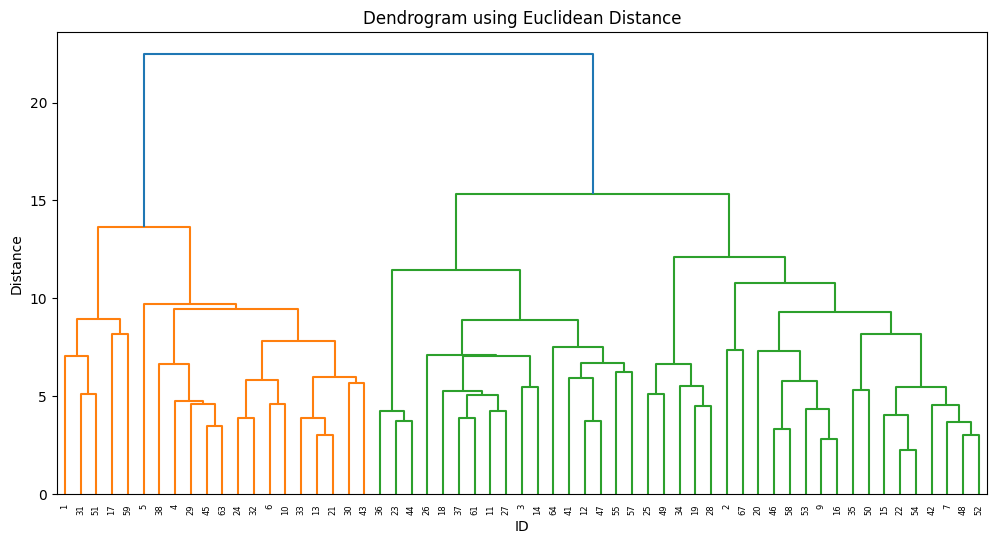

In [13]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Euclidean Distance')
sch.dendrogram(euclidean_clustering_ik, labels=datawithoutknowledge.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.show()

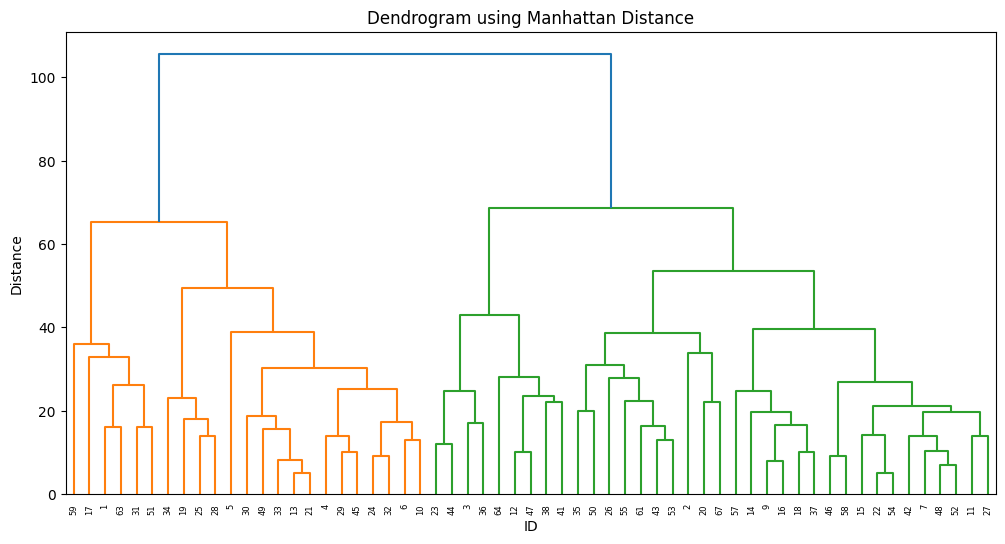

In [14]:
plt.figure(figsize=(12, 6))
plt.title('Dendrogram using Manhattan Distance')
sch.dendrogram(manhattan_clustering_ik, labels=datawithoutknowledge.index)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Distance')
plt.show()

But as we can see, our results are different. 

In [15]:
threshold_euclidea_ik = 11
threshold_manhattan_ik = 45  

euclidean_clusters_ik = fcluster(euclidean_clustering_ik, t=threshold_euclidea_ik, criterion='distance')

manhattan_clusters_ik = fcluster(manhattan_clustering_ik, t=threshold_manhattan_ik, criterion='distance')

data['Euclidean Cluster'] = euclidean_clusters_ik
data['Manhattan Cluster'] = manhattan_clusters_ik

Our number of clusters for both distances is the same with this data set. 

In [16]:
num_euclidean_clusters_ik = len(np.unique(euclidean_clusters_ik))
num_manhattan_clusters_ik = len(np.unique(manhattan_clusters_ik))

print(f"Liczba klastrów (odległość euklidesowa): {num_euclidean_clusters_ik}")
print(f"Liczba klastrów (odległość Manhattan): {num_manhattan_clusters_ik}")

Liczba klastrów (odległość euklidesowa): 6
Liczba klastrów (odległość Manhattan): 6


In [17]:
euclidean_cluster_assignment_ik = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
manhattan_cluster_assignment_ik = data.groupby('Manhattan Cluster').apply(lambda x: list(x.index)).to_dict()

print("\nPrzypisanie obiektów do klastrów (odległość euklidesowa):")
for cluster, members in euclidean_cluster_assignment_ik.items():
    print(f"Klaster {cluster}: {members}")

print("\nPrzypisanie obiektów do klastrów (odległość Manhattan):")
for cluster, members in manhattan_cluster_assignment_ik.items():
    print(f"Klaster {cluster}: {members}")


Przypisanie obiektów do klastrów (odległość euklidesowa):
Klaster 1: [1, 17, 31, 51, 59]
Klaster 2: [4, 5, 6, 10, 13, 21, 24, 29, 30, 32, 33, 38, 43, 45, 63]
Klaster 3: [23, 36, 44]
Klaster 4: [3, 11, 12, 14, 18, 26, 27, 37, 41, 47, 55, 57, 61, 64]
Klaster 5: [19, 25, 28, 34, 49]
Klaster 6: [2, 7, 9, 15, 16, 20, 22, 35, 42, 46, 48, 50, 52, 53, 54, 58, 67]

Przypisanie obiektów do klastrów (odległość Manhattan):
Klaster 1: [1, 17, 31, 51, 59, 63]
Klaster 2: [19, 25, 28, 34]
Klaster 3: [4, 5, 6, 10, 13, 21, 24, 29, 30, 32, 33, 45, 49]
Klaster 4: [3, 12, 23, 36, 38, 41, 44, 47, 64]
Klaster 5: [2, 20, 26, 35, 43, 50, 53, 55, 61, 67]
Klaster 6: [7, 9, 11, 14, 15, 16, 18, 22, 27, 37, 42, 46, 48, 52, 54, 57, 58]


/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_28384/1223854004.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  euclidean_cluster_assignment_ik = data.groupby('Euclidean Cluster').apply(lambda x: list(x.index)).to_dict()
/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_28384/1223854004.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  manhattan_cluster_assignment_ik = data.groupb

## Conclusion

We can conclude basing on our hierachical analysis, that data set without industrial knowlegde gives us better distributed clusters and allows us to evenly distribute students to them.